### 1. max_depth 3 인 의사결정 나무 생성

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
feature_names = iris.feature_names[:2]

from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier(max_depth=3).fit(X, y)
y_pred = tree3.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.8133333333333334

### 2. K=5 인 교차 검증

In [33]:
from sklearn.model_selection import KFold, cross_val_score

cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(tree3, X, y, scoring="accuracy", cv=cv)

array([0.6       , 0.5       , 0.83333333, 0.73333333, 0.8       ])

### 3.  max_depth에 따른 테스트 성능

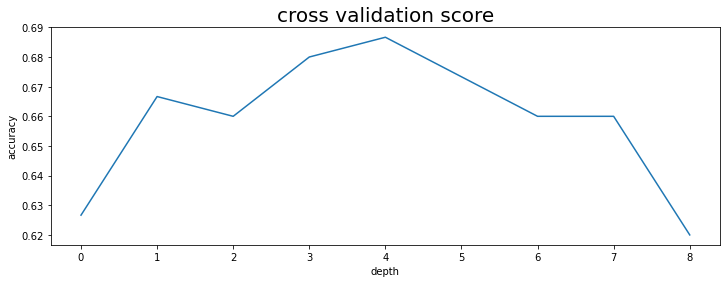

In [45]:
ls = []

for depth in range(1,10):
    cv = KFold(5, shuffle=True, random_state=0)
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=0)
    ls.append(cross_val_score(tree, X, y, scoring="accuracy", cv=cv).mean())
    
plt.figure(figsize=(12,4))
plt.title("cross validation score", size = 20)
plt.ylabel("accuracy")
plt.xlabel("depth")
plt.plot(ls)
plt.show()
    
        